In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully")


Libraries imported successfully


In [8]:
df = pd.read_csv(r"C:\Users\vansh\Desktop\Project\annex2.csv")


In [9]:
# View first 5 rows
df.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,102900005117056,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,102900005115960,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,102900005117056,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,102900005115823,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,102900005115908,0.539,8.0,sale,No


In [12]:
df.info()
df.columns
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878503 entries, 0 to 878502
Data columns (total 7 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         878503 non-null  object 
 1   Time                         878503 non-null  object 
 2   Item Code                    878503 non-null  int64  
 3   Quantity Sold (kilo)         878503 non-null  float64
 4   Unit Selling Price (RMB/kg)  878503 non-null  float64
 5   Sale or Return               878503 non-null  object 
 6   Discount (Yes/No)            878503 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 46.9+ MB


(878503, 7)

In [50]:
#Check Missing vlues
df.isnull().sum()


Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Revenue                        0
dtype: int64

In [16]:
#Convert datecolumn to date time
df['Date'] = pd.to_datetime(df['Date'])


In [20]:
#Sort data by date
df = df.sort_values('Date')


In [23]:
print(df.columns)

Index(['Date', 'Time', 'Item Code', 'Quantity Sold (kilo)',
       'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)'],
      dtype='object')


In [22]:
df.columns = df.columns.str.strip()


In [26]:
df['Revenue'] = df['Quantity Sold (kilo)'] * df['Unit Selling Price (RMB/kg)']


In [27]:
df[['Quantity Sold (kilo)', 'Unit Selling Price (RMB/kg)', 'Revenue']].head()


,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Revenue
0,0.396,7.6,3.0096
661,0.664,8.0,5.3120
662,0.251,6.0,1.5060
663,0.329,18.0,5.9220
664,0.476,8.0,3.8080


In [29]:
print(df.columns)


Index(['Date', 'Time', 'Item Code', 'Quantity Sold (kilo)',
       'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)',
       'Revenue'],
      dtype='object')


In [31]:
df['Date'] = pd.to_datetime(df['Date'])


In [33]:
monthly_sales = df.resample('ME', on='Date')['Revenue'].sum().reset_index()
monthly_sales


,Date,Revenue
0,2020-07-31,122550.2935
1,2020-08-31,133930.3319
2,2020-09-30,106520.8334
3,2020-10-31,122685.2828
4,2020-11-30,84574.6920
5,2020-12-31,99267.8393
6,2021-01-31,135735.1150
7,2021-02-28,178817.9040
8,2021-03-31,92091.7412
9,2021-04-30,74633.4324


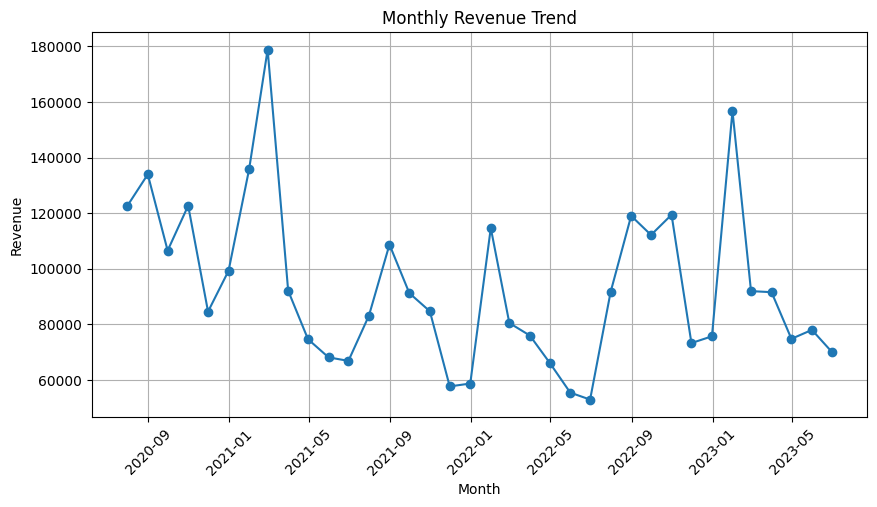

In [35]:
#Monthly Revenue Trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Date'], monthly_sales['Revenue'], marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [36]:
# Save Clean Monthly Data (For Power BI)
monthly_sales.to_csv("monthly_sales.csv", index=False)
print("monthly_sales.csv saved successfully")


monthly_sales.csv saved successfully


In [37]:
# Create Moving Average
monthly_sales['Moving_Avg'] = monthly_sales['Revenue'].rolling(window=3).mean()
monthly_sales


,Date,Revenue,Moving_Avg
0,2020-07-31,122550.2935,NaN
1,2020-08-31,133930.3319,NaN
2,2020-09-30,106520.8334,121000.486267
3,2020-10-31,122685.2828,121045.482700
4,2020-11-30,84574.6920,104593.602733
5,2020-12-31,99267.8393,102175.938033
6,2021-01-31,135735.1150,106525.882100
7,2021-02-28,178817.9040,137940.286100
8,2021-03-31,92091.7412,135548.253400
9,2021-04-30,74633.4324,115181.025867


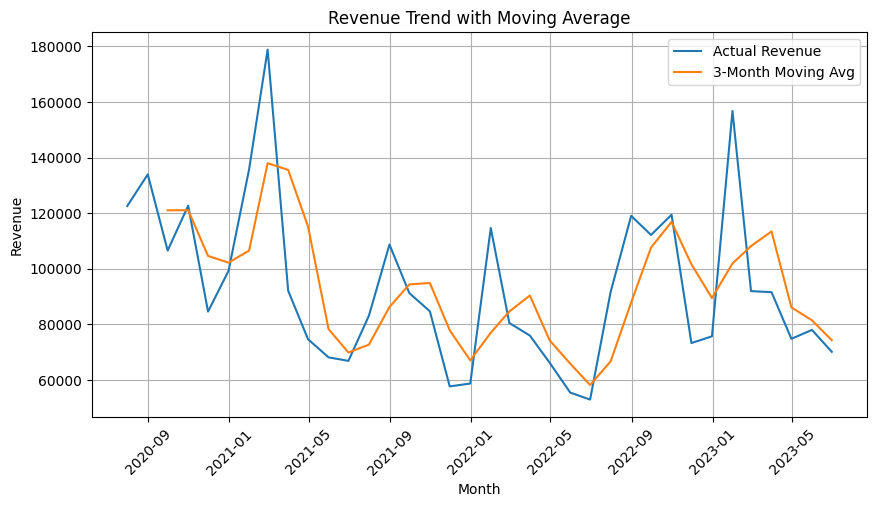

In [38]:
#Plot Actual vs Moving Average 
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Date'], monthly_sales['Revenue'], label='Actual Revenue')
plt.plot(monthly_sales['Date'], monthly_sales['Moving_Avg'], label='3-Month Moving Avg')
plt.title('Revenue Trend with Moving Average')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [39]:
                                                  # Segmentation Analysis 

In [40]:
# Revenue by Discount(Yes/No)
discount_revenue = df.groupby('Discount (Yes/No)')['Revenue'].sum().reset_index()
discount_revenue


,Discount (Yes/No),Revenue
0,No,3.208647e+06
1,Yes,1.611191e+05


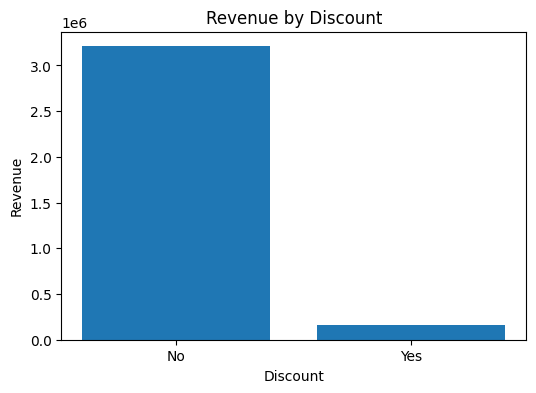

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(discount_revenue['Discount (Yes/No)'], discount_revenue['Revenue'])
plt.title('Revenue by Discount')
plt.xlabel('Discount')
plt.ylabel('Revenue')
plt.show()


In [43]:
# Revenue by Sales or Return
sale_return_revenue = df.groupby('Sale or Return')['Revenue'].sum().reset_index()
sale_return_revenue


,Sale or Return,Revenue
0,return,-2.256865e+03
1,sale,3.372023e+06


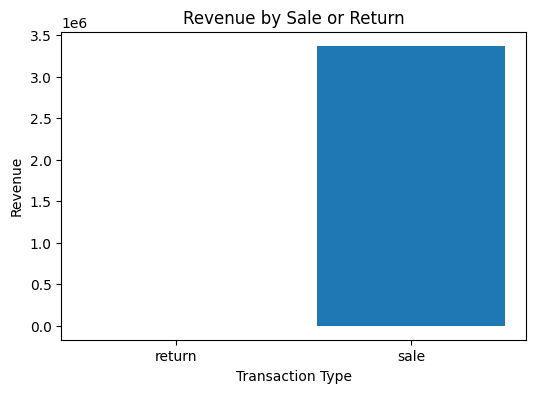

In [44]:
plt.figure(figsize=(6,4))
plt.bar(sale_return_revenue['Sale or Return'], sale_return_revenue['Revenue'])
plt.title('Revenue by Sale or Return')
plt.xlabel('Transaction Type')
plt.ylabel('Revenue')
plt.show()


In [45]:
#Top 10 Products by Revenue
top_products = df.groupby('Item Code')['Revenue'].sum().sort_values(ascending=False).head(10)
top_products


Item Code
102900005116714    269874.2472
102900005116899    211652.1013
102900005116530    211198.3864
102900011016701    205113.6991
102900005115779    129756.9615
102900005116257    117729.4239
102900005117056     95568.6339
102900011000328     82009.3451
102900005115984     70665.1061
102900011021842     64339.6000
Name: Revenue, dtype: float64

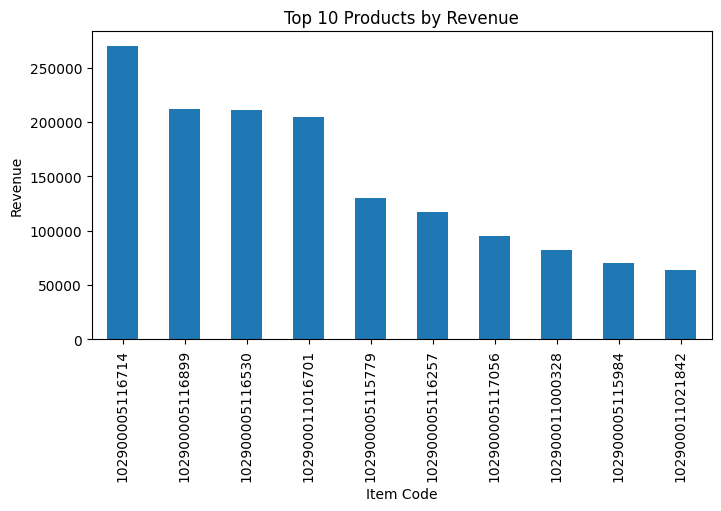

In [46]:
plt.figure(figsize=(8,4))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Item Code')
plt.ylabel('Revenue')
plt.show()


In [47]:
#Discount Impact on Quantity Sold
discount_quantity = df.groupby('Discount (Yes/No)')['Quantity Sold (kilo)'].sum().reset_index()
discount_quantity


,Discount (Yes/No),Quantity Sold (kilo)
0,No,439224.017
1,Yes,31751.901


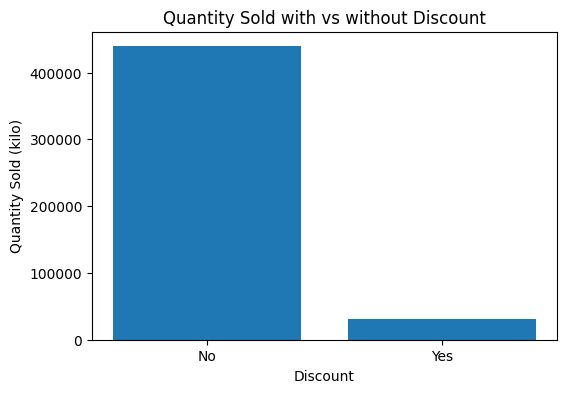

In [48]:
plt.figure(figsize=(6,4))
plt.bar(discount_quantity['Discount (Yes/No)'], discount_quantity['Quantity Sold (kilo)'])
plt.title('Quantity Sold with vs without Discount')
plt.xlabel('Discount')
plt.ylabel('Quantity Sold (kilo)')
plt.show()


In [49]:
#Save Segmentation Data (For Power BI)
discount_revenue.to_csv("discount_revenue.csv", index=False)
sale_return_revenue.to_csv("sale_return_revenue.csv", index=False)
top_products.to_csv("top_products.csv")

print("Segmentation files saved successfully")


Segmentation files saved successfully
